# Value iteration

In [3]:
import numpy as np

class ValueIteration:
    
    def __init__(self, states, actions, tpm, rewards, time_steps, discount=1.0):
        self.states = states
        self.actions = actions
        self.tpm = tpm
        self.rewards = rewards
        self.ts = time_steps
        self.discount = discount

        self.V = np.zeros((self.ts + 1, self.states))
        self.policy = np.zeros((self.ts, self.states), dtype=int)

    def value_iteration(self):
        for t in range(self.ts - 1, - 1, -1): #iteration backwards from t-1 to 0
            for s in range(self.states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    q_vals[a] = self.rewards[s, a] + self.discount * np.sum(self.tpm[s, a, :]*self.V[t + 1, :])
                    self.V[t, s] = np.min(q_vals)
                    self.policy[t, s] = np.argmin(q_vals)
                    return self.policy, self.V

In [5]:
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total states (701)
time_steps = 50
actions = 4         # e.g. possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient when inventory is nonnegative
b_cost = 1          # Backlogging penalty coefficient when inventory is negative

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# ----------------------------------------------------
# Build the transition probability matrix (TPM)
# ----------------------------------------------------
# Transition: S_{t+1} = S_t + A_t - W_t
# Here, W_t is drawn from a discrete uniform distribution over {0, 1, ..., 10}.



w_values = np.arange(0, 11)  # Demand values 0, 1, ..., 10
demand_probs = np.ones(len(w_values)) / len(w_values)  # Uniform probability for each demand value

# Initialize TPM: dimensions (num_states x actions x num_states)
tpm = np.zeros((num_states, actions, num_states))
for i in range(num_states):
    x = i + min_inventory  # current inventory level
    for act in range(actions):
        for w, p_w in zip(w_values, demand_probs):
            new_inventory = x + act - w
            # Clip the new_inventory to be within [min_inventory, max_inventory]
            new_inventory = max(min_inventory, min(new_inventory, max_inventory))
            j = new_inventory - min_inventory  # convert new_inventory to index
            tpm[i, act, j] += p_w

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, tpm, rewards, time_steps, discount)
policy, V = vi.value_iteration()

print("Optimal policy at time 0 for each state (state index corresponds to inventory level index):")
print(policy[10])
print("\nValue function at time 0 for each state:")
print(V[10])

Optimal policy at time 0 for each state (state index corresponds to inventory level index):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [9]:
import numpy as np

class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array and policy array.
        # V has shape (time_steps+1, num_states), policy has shape (time_steps, num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards from the second-to-last time step down to time 0.
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    # Use randint which gives an integer from 0 to 10 (inclusive)
                    w = np.random.randint(0, 11)
                    
                    # Current inventory level corresponding to state index s.
                    current_inventory = s + self.min_inventory
                    
                    # Compute new inventory level after ordering a and subtracting demand w.
                    new_inventory = current_inventory + a - w
                    
                    # Clip new_inventory to lie within the allowed bounds.
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    
                    # Convert new_inventory back to an index.
                    new_index = new_inventory - self.min_inventory
                    
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                
                # For a cost minimization problem, we choose the action with the smallest Q-value.
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory system parameters
# ---------------------------
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total number of states.
time_steps = 50
actions = 4         # Possible order amounts: 0, 1, 2, 3.
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient when inventory is nonnegative.
b_cost = 1          # Backlogging penalty coefficient when inventory is negative.

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
# Each reward is the holding (or backlogging) cost plus the cost of ordering.
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level.
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration without TPM
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

print("Optimal policy at time 0 for each state:")
print(policy[0])
print("\nValue function at time 0 for each state:")
print(V[0])


Optimal policy at time 0 for each state:
[0 0 0 0 2 0 2 0 1 3 2 1 0 3 3 3 2 1 2 3 3 1 3 1 0 1 3 0 0 2 1 3 1 2 0 2 1
 1 0 3 1 3 2 2 2 3 0 2 3 0 2 1 1 2 1 3 3 0 2 0 0 0 0 0 3 3 3 1 1 0 3 0 1 0
 3 1 1 3 1 3 2 3 3 1 3 1 0 2 0 2 3 3 3 3 3 3 3 1 2 3 1 1 2 2 3 0 2 3 2 3 0
 3 3 3 3 1 3 1 0 3 3 2 3 2 3 3 0 2 2 3 1 2 2 3 2 1 3 2 3 3 2 0 2 3 3 2 1 2
 0 1 3 0 3 3 2 1 2 3 1 2 1 0 1 1 1 3 3 3 3 0 1 2 1 1 1 3 1 0 0 3 2 1 3 2 2
 3 2 2 2 0 0 2 0 2 3 2 3 2 3 3 0 3 3 0 2 3 3 1 2 2 0 1 3 2 3 1 3 1 2 1 1 3
 0 2 0 3 3 2 3 3 1 2 1 2 3 2 1 0 0 0 2 0 1 3 2 3 3 3 3 2 1 1 3 0 2 2 3 0 2
 2 3 3 1 2 1 2 2 2 0 3 0 3 0 0 3 1 0 3 0 2 3 1 3 3 1 0 3 1 2 0 3 0 0 3 0 2
 0 3 2 2 3 3 2 0 1 2 2 0 1 3 1 1 1 2 0 0 1 0 1 3 1 1 1 2 1 3 3 0 3 0 3 3 1
 1 2 0 0 1 3 2 1 3 3 2 3 2 2 2 3 1 2 0 1 3 3 3 3 1 2 3 1 3 3 3 3 2 2 1 1 1
 2 2 3 2 2 3 2 0 0 3 2 3 0 1 0 1 1 0 1 3 2 0 2 2 0 3 3 1 0 0 2 0 3 1 2 1 2
 3 2 3 3 0 1 0 2 2 2 1 1 3 2 3 3 2 3 1 3 3 2 3 1 3 3 0 2 1 1 0 3 1 3 1 1 0
 3 2 2 1 0 2 2 3 1 0 0 2 2 1 3 1 3 3 3 1 1 3 0 0 3 1 2 3 2 

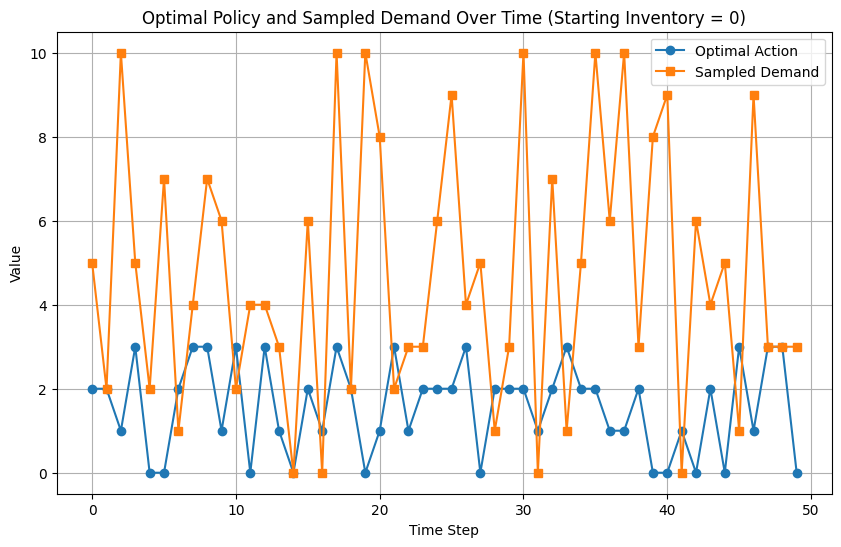

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Define ValueIteration Class
# ---------------------------
class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array (time_steps+1 x num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        # Initialize policy array (time_steps x num_states)
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards in time
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    w = np.random.randint(0, 11)
                    # Current inventory level corresponding to state index s
                    current_inventory = s + self.min_inventory
                    # Compute new inventory level after ordering 'a' and subtracting demand 'w'
                    new_inventory = current_inventory + a - w
                    # Clip new_inventory within allowed bounds
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    # Convert new_inventory back to an index
                    new_index = new_inventory - self.min_inventory
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                # Choose the action that minimizes cost (for cost minimization)
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory System Parameters
# ---------------------------
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total number of states
time_steps = 50
actions = 4         # e.g., possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient (if inventory is nonnegative)
b_cost = 1          # Backlogging penalty coefficient (if inventory is negative)

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

# --------------------------------
# Simulation: Follow the Optimal Policy starting from inventory 0
# --------------------------------
# For inventory 0, compute the corresponding state index.
starting_inventory = 0
current_state = starting_inventory - min_inventory  # e.g., 0 - (-500) = 500

# Lists to store the optimal action and demand at each time step
optimal_actions = []
demand_samples = []

# For each time step, determine the optimal action, sample demand, and update the state.
current_inventory = starting_inventory  # actual inventory level
for t in range(time_steps):
    # Get the optimal action for the current state at time t
    action = policy[t, current_state]
    optimal_actions.append(action)
    
    # Sample demand from a uniform distribution between 0 and 10 (inclusive)
    demand = np.random.randint(0, 11)
    demand_samples.append(demand)
    
    # Update the inventory level: new_inventory = current_inventory + action - demand
    new_inventory = current_inventory + action - demand
    # Clip new_inventory within the allowed bounds
    new_inventory = max(min_inventory, min(new_inventory, max_inventory))
    
    # Update current state and current_inventory
    current_inventory = new_inventory
    current_state = new_inventory - min_inventory

# --------------------------------
# Plot the optimal policy and sampled demand over time
# --------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), optimal_actions, marker='o', label='Optimal Action')
plt.plot(range(time_steps), demand_samples, marker='s', label='Sampled Demand')
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Optimal Policy and Sampled Demand Over Time (Starting Inventory = 0)")
plt.legend()
plt.grid(True)
plt.show()


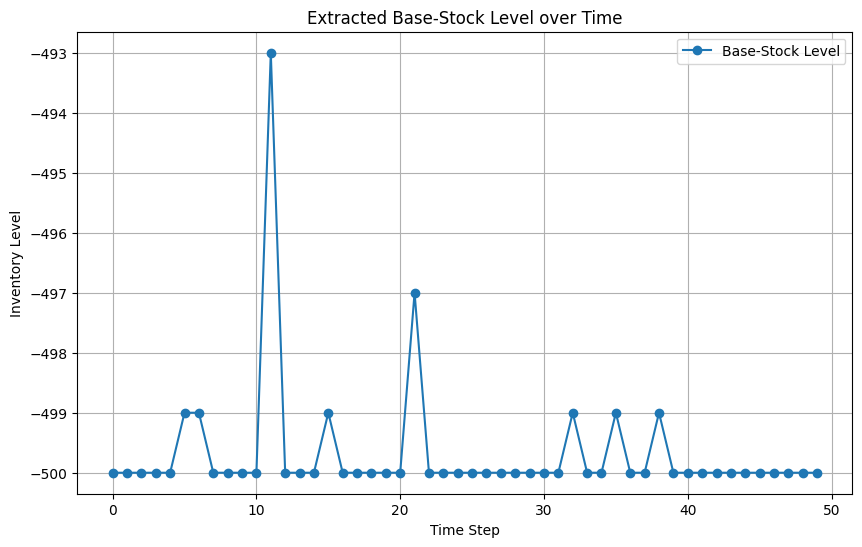

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Define ValueIteration Class
# ---------------------------
class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # number of states
        self.actions = actions        # number of possible actions
        self.rewards = rewards        # reward matrix (num_states x actions)
        self.ts = time_steps          # number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array (time_steps+1 x num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        # Initialize policy array (time_steps x num_states)
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards in time
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    w = np.random.randint(0, 11)
                    # Current inventory level corresponding to state index s
                    current_inventory = s + self.min_inventory
                    # Compute new inventory level after ordering 'a' and subtracting demand 'w'
                    new_inventory = current_inventory + a - w
                    # Clip new_inventory within allowed bounds
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    # Convert new_inventory back to an index
                    new_index = new_inventory - self.min_inventory
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                # Choose the action that minimizes cost (assuming a cost minimization problem)
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        return self.policy, self.V

# ---------------------------
# Inventory System Parameters
# ---------------------------
min_inventory = -500
max_inventory = 200
num_states = max_inventory - min_inventory + 1  # Total number of states
time_steps = 50
actions = 4         # For example, possible order amounts: 0, 1, 2, 3
discount = 1.0
price = 1.0
a_cost = 1          # Holding cost coefficient when inventory is nonnegative
b_cost = 1          # Backlogging penalty coefficient when inventory is negative

def holding_cost(x):
    return a_cost * x if x >= 0 else -b_cost * x

# Build rewards matrix: dimensions (num_states x actions)
rewards = np.zeros((num_states, actions))
for i in range(num_states):
    x = i + min_inventory  # Convert state index to actual inventory level
    for a in range(actions):
        rewards[i, a] = holding_cost(x) + price * a

# --------------------------------
# Run Value Iteration
# --------------------------------
vi = ValueIteration(num_states, actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()

# --------------------------------
# Extract Base-Stock Levels from the Policy
# --------------------------------
def extract_base_stock_levels(policy, min_inventory):
    """
    For each time period, extract the base-stock level.
    This is defined as the lowest inventory level for which the optimal action is 0.
    """
    time_steps, num_states = policy.shape
    base_stock_levels = np.empty(time_steps)
    
    for t in range(time_steps):
        # Find the first state (lowest inventory) where the optimal action is 0.
        idx = np.where(policy[t, :] == 0)[0]
        if idx.size > 0:
            # Use the first occurrence: inventory = index + min_inventory
            base_stock_levels[t] = idx[0] + min_inventory
        else:
            # If no state has action 0, then assume the base-stock level is at the max inventory
            base_stock_levels[t] = num_states - 1 + min_inventory
    return base_stock_levels

base_stock_levels = extract_base_stock_levels(policy, min_inventory)

# --------------------------------
# Plot the Base-Stock Level over Time
# --------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), base_stock_levels, marker='o', label="Base-Stock Level")
plt.xlabel("Time Step")
plt.ylabel("Inventory Level")
plt.title("Extracted Base-Stock Level over Time")
plt.legend()
plt.grid(True)
plt.show()
